In [1]:
import pandas as pd
import numpy as np
import setup_jwlab
from jwlab.constants import cleaned_data_filepath
from jwlab.cluster_analysis_perm import cluster_analysis_procedure
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedKFold
from scipy import stats
import more_itertools as mit
from sklearn.metrics import accuracy_score


In [2]:
# Argument 1: 9 or 11 (month olds)
# Argument 2: Boolean, True to randomize the labels, False otherwise
# Argument 3: averaging, could be: no_averaging, average_trials, average_trials_and_participants, permutation
# Argument 4: sliding_window_config[start_time, end_time, window_lengths[], step_length]
# Argument 5: cross_val_config[num_fold, num_iterations]

#cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [10, 20, 40, 60], 10], [3, 5])

In [3]:
tmass = cluster_analysis_procedure(11, False, "permutation", [-200, 1000, [10], 10], [3, 5])
print(tmass)

0.7272727272727273
0.45454545454545453
0.2727272727272727
0.6363636363636364
0.5454545454545454
0.45454545454545453
0.5454545454545454
0.6363636363636364
0.7272727272727273
0.45454545454545453
0.6363636363636364
0.36363636363636365
0.6363636363636364
0.36363636363636365
0.45454545454545453
0.6363636363636364
0.45454545454545453
0.7272727272727273
0.5454545454545454
0.36363636363636365
0.09090909090909091
0.5454545454545454
0.8181818181818182
0.5454545454545454
0.36363636363636365
0.36363636363636365
0.45454545454545453
0.2727272727272727
0.5454545454545454
0.5454545454545454
0.45454545454545453
0.45454545454545453
0.5454545454545454
0.45454545454545453
0.5454545454545454
0.45454545454545453
0.5454545454545454
0.7272727272727273
0.36363636363636365
0.36363636363636365
0.5454545454545454
0.45454545454545453
0.45454545454545453
0.6363636363636364
0.5454545454545454
0.7272727272727273
0.45454545454545453
0.45454545454545453
0.6363636363636364
0.5454545454545454
0.45454545454545453
0.363636

0.2727272727272727
0.5454545454545454
0.36363636363636365
0.5454545454545454
0.36363636363636365
0.36363636363636365
0.45454545454545453
0.45454545454545453
0.36363636363636365
0.36363636363636365
0.5454545454545454
0.6363636363636364
0.45454545454545453
0.36363636363636365
0.36363636363636365
0.2727272727272727
0.5454545454545454
0.36363636363636365
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.5454545454545454
0.36363636363636365
0.6363636363636364
0.45454545454545453
0.5454545454545454
0.5454545454545454
0.2727272727272727
0.2727272727272727
0.36363636363636365
0.45454545454545453
0.36363636363636365
0.5454545454545454
0.5454545454545454
0.5454545454545454
0.5454545454545454
0.36363636363636365
0.5454545454545454
0.36363636363636365
0.36363636363636365
0.5454545454545454
0.5454545454545454
0.36363636363636365
0.2727272727272727
0.5454545454545454
0.36363636363636365
0.5454545454545454
0.5454545454545454
0.36363636363636365
0.6363636363636364
0.5454545454545454
0.4545454

0.45454545454545453
0.7272727272727273
0.45454545454545453
0.45454545454545453
0.45454545454545453
0.5454545454545454
0.7272727272727273
0.09090909090909091
0.18181818181818182
0.36363636363636365
0.45454545454545453
0.5454545454545454
0.45454545454545453
0.45454545454545453
0.45454545454545453
0.45454545454545453
0.5454545454545454
0.2727272727272727
0.5454545454545454
0.7272727272727273
0.5454545454545454
0.2727272727272727
0.7272727272727273
0.45454545454545453
0.7272727272727273
0.6363636363636364
0.45454545454545453
0.5454545454545454
0.5454545454545454
0.6363636363636364
0.5454545454545454
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.7272727272727273
0.45454545454545453
0.5454545454545454
0.6363636363636364
0.45454545454545453
0.7272727272727273
0.45454545454545453
0.9090909090909091
0.5454545454545454
0.45454545454545453
0.45454545454545453
0.7272727272727273
0.6363636363636364
0.7272727272727273
0.5454545454545454
0.36363636363636365
0.36363636363636365
0.72727272

0.7272727272727273
0.18181818181818182
0.2727272727272727
0.7272727272727273
0.45454545454545453
0.5454545454545454
0.36363636363636365
0.45454545454545453
0.36363636363636365
0.5454545454545454
0.36363636363636365
0.6363636363636364
0.5454545454545454
0.36363636363636365
0.36363636363636365
0.36363636363636365
0.45454545454545453
0.45454545454545453
0.2727272727272727
0.5454545454545454
0.45454545454545453
0.5454545454545454
0.45454545454545453
0.36363636363636365
0.45454545454545453
0.2727272727272727
0.18181818181818182
0.45454545454545453
0.2727272727272727
0.2727272727272727
0.45454545454545453
0.5454545454545454
0.36363636363636365
0.5454545454545454
0.6363636363636364
0.45454545454545453
0.45454545454545453
0.6363636363636364
0.5454545454545454
0.5454545454545454
0.36363636363636365
0.5454545454545454
0.5454545454545454
0.6363636363636364
0.36363636363636365
0.5454545454545454
0.36363636363636365
0.5454545454545454
0.45454545454545453
0.36363636363636365
0.36363636363636365
0.54

0
1
2
3
4
5
6
7
8
9


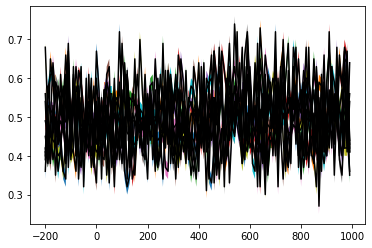

In [4]:
itr = 10 
arrTmass = []

for i in range(itr):
    tmass = cluster_analysis_procedure(11, True, "permutation", [-200, 1000, [10], 10], [3, 15])
    arrTmass.append(round(tmass, 4))
    print(i)
print(arrTmass)

In [5]:
arrTmass

[0.021, 0.0001, 0.0004, 0.0113, 0.0228, 0, 0.0055, 0.0041, 0, 0.0009]